In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
df = pd.read_csv('educ.csv')
df.head(10)

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
4,1/1/08 0:00,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
5,1/1/08 0:00,00 to 17,Male,No high school diploma,"F: 35,000 to 49,999",2227
6,1/1/08 0:00,00 to 17,Male,No high school diploma,"E: 25,000 to 34,999",2606
7,1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","D: 15,000 to 24,999",3465
8,1/1/08 0:00,00 to 17,Male,No high school diploma,"D: 15,000 to 24,999",3974
9,1/1/08 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",4233


In [6]:
df.columns

Index(['Year', 'Age', 'Gender', 'Educational Attainment', 'Personal Income',
       'Population Count'],
      dtype='object')

In [11]:
df['Year'] = pd.to_datetime(df['Year'], format='%m/%d/%y %H:%M')
df

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,2008-01-01,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,2008-01-01,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,2008-01-01,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,2008-01-01,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
4,2008-01-01,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
...,...,...,...,...,...,...
1021,2014-01-01,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,2014-01-01,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,2014-01-01,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,2014-01-01,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


In [14]:
df = df[(df['Year'].dt.year == 2014)] 
df

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
881,2014-01-01,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1356
882,2014-01-01,00 to 17,Female,High school or equivalent,"B: 5,000 to 9,999",1583
883,2014-01-01,00 to 17,Male,"College, less than 4-yr degree","D: 15,000 to 24,999",1664
884,2014-01-01,00 to 17,Male,High school or equivalent,"B: 5,000 to 9,999",2048
885,2014-01-01,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
...,...,...,...,...,...,...
1021,2014-01-01,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,2014-01-01,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,2014-01-01,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,2014-01-01,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


In [19]:
df['Age Start'], df['Age End'] = df['Age'].str.split('to', expand=True)
df['Age Start'] = pd.to_numeric(df['Age Start'])
df['Age End'] = pd.to_numeric(df['Age End'])

# Filter df for the year 2014 and adults (age > 17)
df = df[(df['Year'].dt.year == 2014) & (df['Age Start'] > 17)]
df

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count,Age Start,Age End


In [20]:
df['Age Start']

0       0
1       0
2       0
3       0
4       0
       ..
1021    0
1022    0
1023    0
1024    0
1025    0
Name: Age Start, Length: 1026, dtype: int64

In [23]:
edu_grouped = df.groupby('Educational Attainment')['Population Count'].sum()
edu_grouped

Educational Attainment
Bachelor's degree or higher       54617676
College, less than 4-yr degree    52137494
High school or equivalent         42942926
No high school diploma            40668871
Name: Population Count, dtype: int64

In [24]:
edu_percentage = edu_grouped / edu_grouped.sum() * 100
edu_percentage

Educational Attainment
Bachelor's degree or higher       28.690732
College, less than 4-yr degree    27.387889
High school or equivalent         22.557971
No high school diploma            21.363408
Name: Population Count, dtype: float64

In [25]:
contingency_table = pd.pivot_table(df, values='Population Count', index='Educational Attainment', columns='Personal Income', aggfunc='sum', fill_value=0)

In [26]:
print("Educational Attainment vs Population Count:")
print(edu_grouped)
print("\nPercentage Distribution of Educational Attainment:")
print(edu_percentage)
print("\nContingency Table (Educational Attainment vs Personal Income):")
print(contingency_table)

Educational Attainment vs Population Count:
Educational Attainment
Bachelor's degree or higher       54617676
College, less than 4-yr degree    52137494
High school or equivalent         42942926
No high school diploma            40668871
Name: Population Count, dtype: int64

Percentage Distribution of Educational Attainment:
Educational Attainment
Bachelor's degree or higher       28.690732
College, less than 4-yr degree    27.387889
High school or equivalent         22.557971
No high school diploma            21.363408
Name: Population Count, dtype: float64

Contingency Table (Educational Attainment vs Personal Income):
Empty DataFrame
Columns: []
Index: []


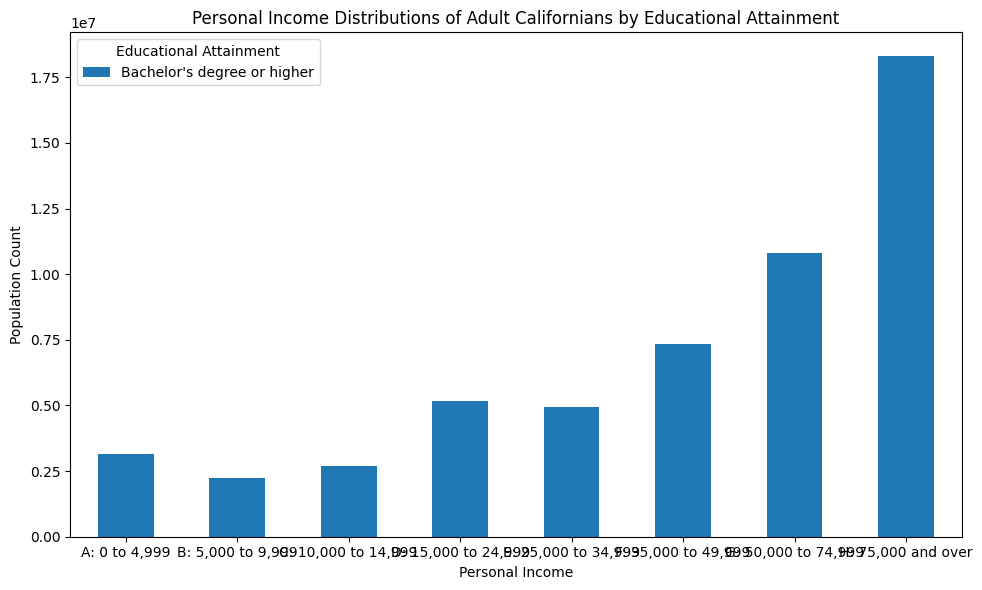

In [28]:
selected_edu_levels = ["No high diploma", "Bachelor's degree or higher"]
filtered_df = df[df['Educational Attainment'].isin(selected_edu_levels)]

# Group the filtered df by personal income and calculate sums
income_distribution = filtered_df.groupby(['Educational Attainment', 'Personal Income'])['Population Count'].sum().reset_index()

# Pivot the df for plotting
income_pivot = income_distribution.pivot(index='Personal Income', columns='Educational Attainment', values='Population Count')

# Plot the bar chart
ax = income_pivot.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Personal Income')
ax.set_ylabel('Population Count')
ax.set_title('Personal Income Distributions of Adult Californians by Educational Attainment')
plt.xticks(rotation=0)
plt.legend(title='Educational Attainment')
plt.tight_layout()
plt.show()






